___
# Atividade: Modelos probabilísticos contínuos e Dados
___

## Aula 18

<div id="indice"></div>

## Índice

- [Teoria: Distribuição Normal em Python](#teoria)
- [Problema: Concentração de poluente em um tanque de combustível](#problema)
    - [Modelo teórico](#modelo-teorico)
        - [Exercício 1](#ex1)
        - [Exercício 2](#ex2)
        - [Exercício 3](#ex3)
        - [Exercício 4](#ex4)
    - [Resultados empíricos](#resultados-empiricos)
        - [Exercício 5](#ex5)
        - [Exercício 6](#ex6)
    - [Comparação: resultados empíricos *vs* modelo teórico](#comparacao)
        - [Exercício 7](#ex7)
        - [Exercício 8](#ex8)
        - [Exercício 9](#ex9)
        - [Exercício 10](#ex10)
- [Normal Padrão](#z)        
     - [Exercício 11](#ex11)
- [Lista de comandos utilizados neste notebook](#comandos)

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
from math import sqrt

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

___

<div id="teoria"></div>

## Teoria: Distribuição Normal em Python

![Caixa de galton](LegalTameChanticleer-size_restricted.gif)

[Fonte: https://www.youtube.com/watch?v=UCmPmkHqHXk](https://www.youtube.com/watch?v=UCmPmkHqHXk&t=271s)

A biblioteca SciPy está cheia de funções para nos ajudar a trabalhar com variáveis aleatórias! https://en.wikipedia.org/wiki/SciPy

Algumas funções úteis para desenvolver seu código considerando a distribuição Normal: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

Lembrando que vamos assumir que $X\sim N(\mu, \sigma^2)$.

Logo, faça `from scipy import stats`, então:

* $f(x)$: `stats.norm.pdf(x, loc=mu, scale=sigma)`

* $P(X\leq x)$: `stats.norm.cdf(x, loc=mu, scale=sigma)`

* $x$ tal que $p=P(X\leq x)$: `stats.norm.ppf(p, loc=mu, scale=sigma)`

* $E(X)$: `stats.norm.mean(loc=mu, scale=sigma)`

* $Var(X)$: `stats.norm.var(loc=mu, scale=sigma)`

* $DP(X)$: `stats.norm.std(loc=mu, scale=sigma)`

___

<div id="problema"></div>

# Problema: Concentração de poluente em um tanque de combustível

A concentração (em $\mu g/L$) de um determinado poluente em um tanque de combustível é modelada como uma normal com média 500 e variância 645.

Nesse caso, vamos assumir que a variável aleatória contínua é dada por:

- $X$: concentração do poluente em um tanque de combustível, em $\mu g/L$.

Pelo modelo teórico, temos: $X\sim N(500, 645).$ Note que $\sigma^2 = 645$, então devemos utilizar $\sigma = \sqrt{645}$ nas funções do `scipy.stats`.

<div id="modelo-teorico"></div>

## Modelo teórico

<div id="ex1"></div>

### EXERCÍCIO 1

Plote a função de densidade de probabilidade **e** a função cumulativa considerando o modelo utilizado. 

**Dica 1**: fizemos isso com a distribuição exponencial na Aula 16.

**Dica 2**: utilize o intervalo entre 350 e 650 para os valores de $x$.

In [4]:
# ESCREVA SEU CÓDIGO AQUI

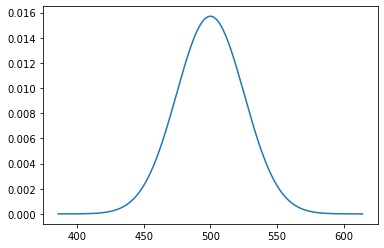

In [6]:
mu = 500
sigma = 645**0.5

x1 = np.linspace(mu-4.5*sigma,mu+4.5*sigma,1000)
fx = stats.norm.pdf(x1,loc=mu,scale=sigma)

plt.plot(x1,fx)

<div id="ex2"></div>

### EXERCÍCIO 2

Foi desenvolvido um sensor que acende uma luz no painel do automóvel para avisar o motorista que a concentração do poluente no tanque de combustível está crítica, ou seja, ultrapassa 550 $\mu g/L$. Responda:

1. Sabendo que a luz acendeu, qual é a probabilidade da concentração do poluente ser superior a 580 $\mu g/L$?
2. Sabendo que a luz acendeu, qual é a probabilidade da concentração do poluente ser inferior a 560 $\mu g/L$?

*Resposta esperada: (1) 0.03333307956104959 (2) 0.6294099002523195*

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

In [15]:
(1-stats.norm.cdf(580, loc=mu, scale=sigma))/(1-stats.norm.cdf(550, loc=mu, scale=sigma))

0.03333307956104959

In [16]:
(stats.norm.cdf(560, loc=mu, scale=sigma)-stats.norm.cdf(550, loc=mu, scale=sigma))/(1-stats.norm.cdf(550, loc=mu, scale=sigma))

0.6294099002523195

<div id="ex3"></div>

### EXERCÍCIO 3

A partir de qual concentração de poluente a luz do painel deveria acender para que apenas as 10% maiores concentrações fossem consideradas críticas? E para que apenas as 0,1% maiores concentrações fossem consideradas críticas?

*Resposta esperada: 532.547373131662 e 578.4821669580019*

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

In [21]:
stats.norm.ppf(1-0.1, loc=mu, scale=sigma)

532.547373131662

In [20]:
stats.norm.ppf(1-0.001, loc=mu, scale=sigma)

578.4821669580019

<div id="ex4"></div>

### EXERCÍCIO 4

Foi desenvolvida uma nova técnica que inicialmente aumenta a concentração do poluente em 100 $\mu g/L$ e depois reduz a nova concentração em 40%. Qual será a nova média e desvio padrão da concentração do poluente se aplicarmos essa nova técnica? Justifique sua resposta.

**Dica:** utilize as propriedades de esperança e variância.

*Resposta esperada: 360 e 15.238110119040353*

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

In [24]:
(stats.norm.mean(loc=mu, scale=sigma)+100)*0.6

360.0

In [67]:
stats.norm.std(loc=360, scale=sigma)*0.6

15.238110119040353

<div id="resultados-empiricos"></div>

## Resultados empíricos

O arquivo `poluentes.csv` contém observações da concentração do poluente em tanques de combustível.

In [27]:
poluentes = pd.read_csv('poluentes.csv', header=None)
poluentes.columns = ['concentracao']
concentracao = poluentes['concentracao']
poluentes.head()

,concentracao
0,505.9817
1,493.6099
2,512.1535
3,484.6500
4,517.8975


<div id="ex5"></div>

### EXERCÍCIO 5

Considerando medidas-resumo, faça uma **análise descritiva** desses valores. Baseado nos dados, estime os valores dos parâmetros do modelo normal (média $\mu$ e desvio padrão $\sigma$).

*Resposta esperada: média=500.572255 desvio padrão=25.358164991137812*

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

In [28]:
poluentes.describe()

,concentracao
count,400.000000
mean,500.572255
std,25.358165
min,415.746500
25%,483.369675
50%,500.735700
75%,518.428600
max,581.337400


In [29]:
mu_ex5 = 500.572255
sigma_ex5 = 25.358165

<div id="ex6"></div>

### EXERCÍCIO 6

Verifique quais seriam as respostas para o [Exercício 2](#ex2) utilizando os dados. Para isso, considere apenas as concentrações acima de 550 $\mu g/L$. Dentre essas concentrações, calcule a frequência relativa das que são:

1. Superiores a 580 $\mu g/L$.
2. Inferiores a 560 $\mu g/L$.

Discuta como esses valores se comparam às respostas do exercício 2. Por que são encontradas essas diferenças?

*Resposta esperada: (1) 0.14285714285714285 (2) 0.7142857142857143*

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

In [46]:
superioresa550 = poluentes.loc[poluentes.concentracao>550,:]

superioresa580 = superioresa550.loc[superioresa550.concentracao>580,:]
inferioresa560 = superioresa550.loc[superioresa550.concentracao<560,:]

print(len(superioresa580)/len(superioresa550))
print(len(inferioresa560)/len(superioresa550))

0.14285714285714285
0.7142857142857143


<div id="comparacao"></div>

## Comparação: resultados empíricos *vs* modelo teórico

<div id="ex7"></div>
    
### EXERCÍCIO 7

> Uma maneira de sabermos se uma escolha de modelo teórico é adequado para descever o comportamento de uma variável mensurada em um problema real é utilizarmos a função `probplot()`. <p> 
Essa função `probplot()` traça uma reta indicando o que seria esperado do ponto de vista teórico utilizando a distribuição teórica *versus* os dados reais encontrados. Quanto mais próximos os pontos estiverem dessa reta, mais provável será que os dados sigam a distribuição escolhida nessa função.
    

Consulte a [documentação da função `probplot()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) e gere o `probplot()` com a distribuição normal. 

Discuta se é razoável assumirmos que os dados vieram de uma distribuição normal. **Dica**: para visualizar o gráfico utilize o argumento `plot=plt` na chamada da função `probplot()`.

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

((array([-2.92336218, -2.63535913, -2.47295045, -2.35755533, -2.26698478,
         -2.19190181, -2.1274581 , -2.0708001 , -2.0201009 , -1.97411768,
         -1.93196517, -1.89298964, -1.85669409, -1.82269149, -1.79067433,
         -1.76039407, -1.73164687, -1.70426336, -1.67810123, -1.65303972,
         -1.62897542, -1.6058191 , -1.58349316, -1.56192972, -1.54106902,
         -1.52085818, -1.50125015, -1.48220291, -1.46367871, -1.44564358,
         -1.42806678, -1.41092042, -1.39417912, -1.37781969, -1.36182093,
         -1.34616333, -1.33082898, -1.31580134, -1.3010651 , -1.28660611,
         -1.2724112 , -1.25846816, -1.24476556, -1.23129278, -1.21803987,
         -1.20499751, -1.19215696, -1.17951003, -1.16704898, -1.15476657,
         -1.14265594, -1.13071061, -1.11892449, -1.10729178, -1.09580701,
         -1.08446499, -1.07326079, -1.06218972, -1.05124734, -1.0404294 ,
         -1.02973187, -1.01915091, -1.00868282, -0.99832412, -0.98807145,
         -0.97792161, -0.96787152, -0.

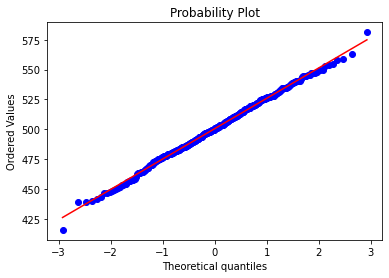

In [86]:
stats.probplot(poluentes.concentracao, plot=plt)

<div id="ex8"></div>
    
### EXERCÍCIO 8

Construa um histograma para visualizar os dados de concentração de poluentes divididos em 21 faixas. **Dica**: consulte a documentação da função aqui: [https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html). Além disso, há um exemplo de histograma na atividade da aula 15 (distribuição exponencial).

Plote também a função de densidade de probabilidade (f.d.p.) da distribuição normal utilizando os novos parâmetros calculados a partir dos dados.

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

(array([0.00031516, 0.        , 0.        , 0.00189095, 0.00346675,
        0.00283643, 0.00598802, 0.00819414, 0.01481248, 0.01323668,
        0.01670344, 0.01449732, 0.01260637, 0.01166089, 0.00819414,
        0.00567286, 0.00378191, 0.00126064, 0.00063032, 0.        ]),
 array([415.        , 422.95238095, 430.9047619 , 438.85714286,
        446.80952381, 454.76190476, 462.71428571, 470.66666667,
        478.61904762, 486.57142857, 494.52380952, 502.47619048,
        510.42857143, 518.38095238, 526.33333333, 534.28571429,
        542.23809524, 550.19047619, 558.14285714, 566.0952381 ,
        574.04761905]),
 <BarContainer object of 20 artists>)

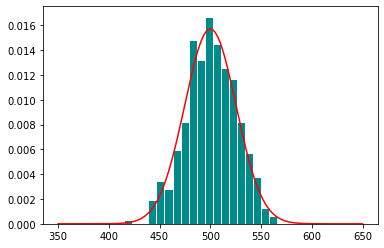

In [74]:
poluentes.concentracao.describe()

faixas = arange(415,582,((582-415))/21)

plt.plot(x1,fx,'red')
plt.hist(poluentes.concentracao, bins=faixas, color='darkcyan', edgecolor='white',density=True)

<div id="ex9"></div>

### EXERCÍCIO 9

Vamos simular a aplicação da técnica introduzida no [Exercício 4](#ex4). Crie uma nova coluna em `poluentes` chamada `'nova concentracao'`. Essa coluna deve ser o resultado da aplicação da técnica do exercício 4 em cada valor da coluna `'concentracao'`, ou seja, para cada valor de concentração, adicionar 100 e aplicar a redução de 40%.

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

In [76]:
poluentes['nova concentracao'] = (poluentes.concentracao + 100)*0.6

poluentes

,concentracao,nova concentracao
0,505.9817,363.58902
1,493.6099,356.16594
2,512.1535,367.29210
3,484.6500,350.79000
4,517.8975,370.73850
...,...,...
395,508.2560,364.95360
396,499.8426,359.90556
397,486.0951,351.65706
398,540.8380,384.50280


<div id="ex10"></div>

### EXERCÍCIO 10

Calcule a média e o desvio padrão dessa nova coluna `'nova concentracao'`. Discuta como ela se compara com relação aos valores teóricos obtidos no [exercício 4](#ex4).

*Resposta esperada: Média: 360.3433531500001 DP: 15.21489899468268*

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

In [79]:
poluentes['nova concentracao'].mean()

360.3433531500001

In [81]:
poluentes['nova concentracao'].std()

15.21489899468268

___

<div id="z"></div>

# Normal Padrão

Seja $X$ uma variável aleatória com média $\mu$ e variância $\sigma^2$, ou seja, 

$\qquad\qquad X\sim N(\mu, \sigma^2)$.

Então a variável aleatória definida por

$\qquad\qquad Z=\frac{(X−\mu)}{\sigma}$

terá média zero e variância 1. 

Ainda, prova-se que

$\qquad\qquad Z=\frac{(X−\mu)}{\sigma} \sim N(0;1)$,

pois toda combinação linear de uma v.a. com distribuição normal também é uma normal.

<div id="ex11"></div>

### EXERCÍCIO 11

Se $X\sim N(500, 645)$, então **UTILIZANDO A DISTRIBUIÇÃO NORMAL PADRÃO**, calcule:
* P(X < 480)
* P(X > 509)
* Valor de x tal que P(X < x) seja igual a 5%.

In [80]:
# ESCREVA SEU CÓDIGO AQUI

In [82]:
mu_ex11 = 500
sigma_ex11 = 645**0.5
stats.norm.cdf(480,loc=mu_ex11,scale=sigma_ex11)

0.21549483921649415

In [83]:
1-stats.norm.cdf(509,loc=mu_ex11,scale=sigma_ex11)

0.361529063464055

In [84]:
stats.norm.ppf(0.05,loc=mu_ex11,scale=sigma_ex11)

458.22589883801754

<div id="comandos"></div>

___

## Lista de comandos utilizados neste notebook

Os seguintes comandos foram utilizados neste jupyter notebook. Para facilitar sua consulta, escreva um resumo do que cada um deles faz:

- [`.pdf`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.cdf`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.ppf`](#ppf): ESCREVA AQUI O RESUMO
- [`.mean`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.var`](#pmf-stats): ESCREVA AQUI O RESUMO
